In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import os
import platform
from platform import python_version
import jupyterlab

import matplotlib.pyplot as plt
from datetime import datetime

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Darwin
release: 18.7.0

Python
version: 3.7.3

Python Packages
jupterlab==1.1.5
pandas==1.0.0
numpy==1.17.4


In [3]:
plt.rcParams["figure.facecolor"] = "w"

In [134]:
df = pd.DataFrame({"bin": [0, 1, 2, 4, 5], "value": [1, 2, 3, 2, 5]})
df.shape

(5, 2)

In [135]:
df

,bin,value
0,0,1
1,1,2
2,2,3
3,4,2
4,5,5


In [136]:
weighted_average = (df.bin * df.value).sum() / df.value.sum()
weighted_average

3.1538461538461537

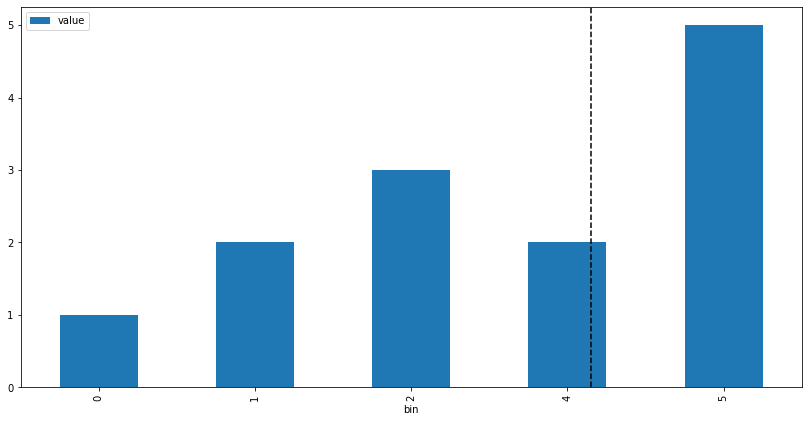

In [137]:
ax = df.plot.bar(x="bin", y="value", figsize=(14, 7))
ax.axvline(weighted_average, color="black", linestyle="--", label="Weighted average")

In [138]:
df = df.append({"bin": 3, "value": 0}, ignore_index=True)
df = df.sort_values(["bin"]).reset_index(drop=True)

In [139]:
df

,bin,value
0,0,1
1,1,2
2,2,3
3,3,0
4,4,2
5,5,5


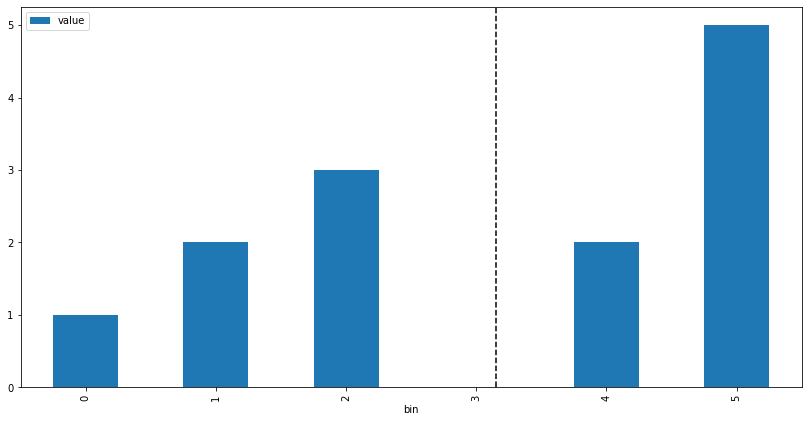

In [52]:
ax = df.plot.bar(x="bin", y="value", figsize=(14, 7))
ax.axvline(weighted_average, color="black", linestyle="--", label="Weighted average")

In [140]:
df_train = pd.DataFrame({"feat": np.random.rand(1000)})
df_test = pd.DataFrame({"feat": np.random.rand(1000)})

In [141]:
df_train

,feat
0,0.266349
1,0.890336
2,0.172578
3,0.729294
4,0.248798
...,...
995,0.129390
996,0.547107
997,0.746495
998,0.636268


In [142]:
df_train.loc[:, "feat_bin"] = pd.qcut(df_train.feat, 10, labels=False)
df_train

,feat,feat_bin
0,0.266349,2
1,0.890336,8
2,0.172578,1
3,0.729294,7
4,0.248798,2
...,...,...
995,0.129390,1
996,0.547107,5
997,0.746495,7
998,0.636268,6


In [143]:
df_test.loc[:, "feat_bin"] = pd.qcut(df_test.feat, 10, labels=False)
df_test

,feat,feat_bin
0,0.294102,2
1,0.571480,5
2,0.753343,7
3,0.030228,0
4,0.699942,7
...,...,...
995,0.029048,0
996,0.867419,8
997,0.147510,1
998,0.093708,0


In [69]:
df_train.loc[:, "feat_bin"], feat_bins = pd.qcut(df_train["feat"], 10, labels=False, retbins=True)
df_train

,feat,feat_bin
0,0.479995,4
1,0.031599,0
2,0.269777,2
3,0.548331,5
4,0.207935,2
...,...,...
995,0.939967,9
996,0.436288,4
997,0.894522,9
998,0.898392,9


In [71]:
feat_bins

array([8.00296009e-04, 8.27041149e-02, 1.83487678e-01, 2.89539672e-01,
       3.89987164e-01, 4.98902517e-01, 6.15882594e-01, 7.02465079e-01,
       8.04221493e-01, 8.91121321e-01, 9.99799581e-01])

In [73]:
feat_bins = np.concatenate(([-np.inf], feat_bins[1:-1], [np.inf]))
feat_bins

array([      -inf, 0.08270411, 0.18348768, 0.28953967, 0.38998716,
       0.49890252, 0.61588259, 0.70246508, 0.80422149, 0.89112132,
              inf])

In [75]:
df_test.loc[:, "feat_bin"] = pd.cut(df_test.feat, feat_bins, labels=False)
df_test

,feat,feat_bin
0,0.485560,4
1,0.307222,3
2,0.608054,5
3,0.530871,5
4,0.012206,0
...,...,...
995,0.975463,9
996,0.734652,7
997,0.708907,7
998,0.355773,3


In [162]:
df_db = pd.DataFrame({"key": [1, 2, 3, None], "value": [2, 2, 3, 1]})

In [163]:
df_ot = pd.DataFrame({"key": ["3", "4", "5", "Null"], "value": [1, 2, 1, 0]})

In [164]:
df_db

,key,value
0,1.0,2
1,2.0,2
2,3.0,3
3,NaN,1


In [173]:
df_ot

,key,value
0,3,1
1,4,2
2,5,1
3,Null,0


In [166]:
df = pd.concat((df_db, df_ot))

In [167]:
df

,key,value
0,1,2
1,2,2
2,3,3
3,NaN,1
0,3,1
1,4,2
2,5,1
3,Null,0


In [168]:
df[df.key.duplicated()]

,key,value


In [170]:
df = df[df.key != "Null"]
df = df[df.key.notnull()]
df

,key,value
0,1,2
1,2,2
2,3,3
0,3,1
1,4,2
2,5,1


In [171]:
df.key = df.key.astype(int)

In [172]:
df[df.key.duplicated()]

,key,value
0,3,1
